# Desafios de Data Science
### Este notebook apresenta a resolução dos desafios obrigatório e eletivo (Desafio 1) do módulo de Estatística para Data Science.
### Aluno: José Eduardo da Silva Bezerra

In [1]:

# Bibliotecas utilizadas
%pip install numpy pandas matplotlib seaborn scipy
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

# Estilo de gráficos
sns.set(style="whitegrid")


Defaulting to user installation because normal site-packages is not writeable
  Using cached cycler-0.12.1-py3-none-any.whl.metadata (3.8 kB)
  Using cached pillow-11.2.1-cp312-cp312-win_amd64.whl.metadata (9.1 kB)
   ---------------------------------------- 0.0/8.1 MB ? eta -:--:--
   ------------------ --------------------- 3.7/8.1 MB 19.8 MB/s eta 0:00:01
   ---------------------------------------- 8.1/8.1 MB 22.7 MB/s eta 0:00:00
   ---------------------------------------- 0.0/41.0 MB ? eta -:--:--
   ------- -------------------------------- 7.3/41.0 MB 41.2 MB/s eta 0:00:01
   --------------- ------------------------ 15.5/41.0 MB 38.9 MB/s eta 0:00:01
   --------------------- ------------------ 22.0/41.0 MB 36.6 MB/s eta 0:00:01
   ------------------------------ --------- 31.7/41.0 MB 39.5 MB/s eta 0:00:01
   ------------------------------------- -- 38.8/41.0 MB 38.5 MB/s eta 0:00:01
   ---------------------------------------- 41.0/41.0 MB 34.3 MB/s eta 0:00:00
Using cached cycler


[notice] A new release of pip is available: 25.0.1 -> 25.1.1
[notice] To update, run: C:\Users\Aluno\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


## Desafio Obrigatório - Análise de Dados de Vendas

In [ ]:

# Criar DataFrame com os dados fornecidos
dados_vendas = pd.DataFrame({
    "Região": ["Norte", "Norte", "Sul", "Sul", "Leste", "Oeste"],
    "Mês": ["Jan", "Fev", "Jan", "Fev", "Mar", "Jan"],
    "Vendas": [1700, np.nan, 2300, 1950, 2100, 1850],
    "Despesas": [320, 270, np.nan, 410, 360, 300]
})

# Salvar como Excel
excel_path = "relatorio_vendas.xlsx"
dados_vendas.to_excel(excel_path, index=False)
excel_path  # Caminho salvo


'vendas.xlsx'

In [ ]:

# Carregar o arquivo
df = pd.read_excel(excel_path)

# Ver dados iniciais
print("Dados originais:")
print(df)

# Substituir NaN em 'Vendas' pela mediana e em 'Despesas' pela média
df["Vendas"].fillna(df["Vendas"].median(), inplace=True)
df["Despesas"].fillna(df["Despesas"].mean(), inplace=True)

# Agrupar por Região e Mês
agrupado = df.groupby(["Região", "Mês"]).agg({
    "Vendas": "sum",
    "Despesas": "mean"
}).reset_index()

# Mostrar resultado
print("\nDados agrupados:")
print(agrupado)

# Combinar colunas horizontalmente (hstack)
combinado = np.hstack([df["Vendas"].values.reshape(-1,1), df["Despesas"].values.reshape(-1,1)])
print("\nColunas combinadas (Vendas e Despesas):")
print(combinado)

# Sumário estatístico
print("\nSumário estatístico:")
print(df.describe())

#localizar o arquivo em excel
import os

print("Arquivo salvo em:", os.path.abspath(excel_path))



## Desafio Eletivo 1 - Análise de Idades e Testes Estatísticos

In [2]:

# Grupos de idade
grupo1 = np.array([11,14,17,21,20,23,26,31,34,41])
grupo2 = np.array([14,18,20,24,24,27,31,32,37,41])

# Estatísticas básicas
def resumo_estatistico(grupo):
    media = np.mean(grupo)
    variancia = np.var(grupo, ddof=1)
    iqr = stats.iqr(grupo)
    return media, variancia, iqr

media1, var1, iqr1 = resumo_estatistico(grupo1)
media2, var2, iqr2 = resumo_estatistico(grupo2)

print(f"Grupo 1 - Média: {media1:.2f}, Variância: {var1:.2f}, IQR: {iqr1:.2f}")
print(f"Grupo 2 - Média: {media2:.2f}, Variância: {var2:.2f}, IQR: {iqr2:.2f}")

# Teste de normalidade
sw1 = stats.shapiro(grupo1)
sw2 = stats.shapiro(grupo2)
print(f"Shapiro-Wilk Grupo 1: W={sw1.statistic:.4f}, p={sw1.pvalue:.4f}")
print(f"Shapiro-Wilk Grupo 2: W={sw2.statistic:.4f}, p={sw2.pvalue:.4f}")


Grupo 1 - Média: 23.80, Variância: 87.29, IQR: 12.00
Grupo 2 - Média: 26.80, Variância: 72.62, IQR: 10.75
Shapiro-Wilk Grupo 1: W=0.9703, p=0.8933
Shapiro-Wilk Grupo 2: W=0.9788, p=0.9582


Distribuição normal - realizando teste t de Student...
Teste t: estatística t=-0.7502, p=0.4628


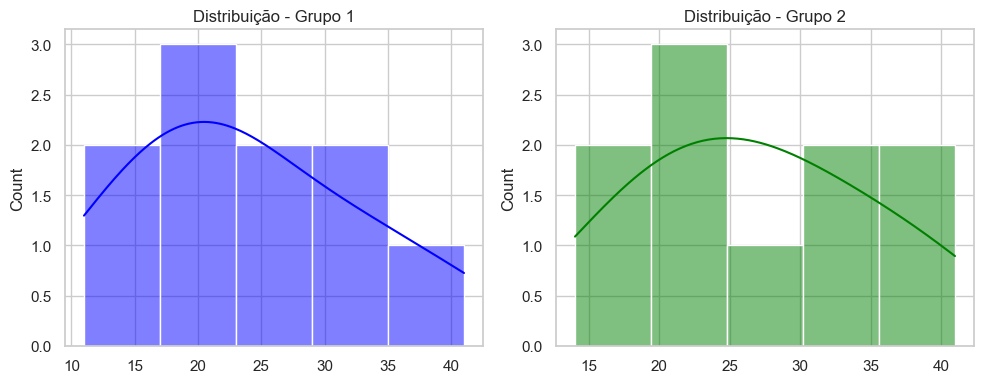

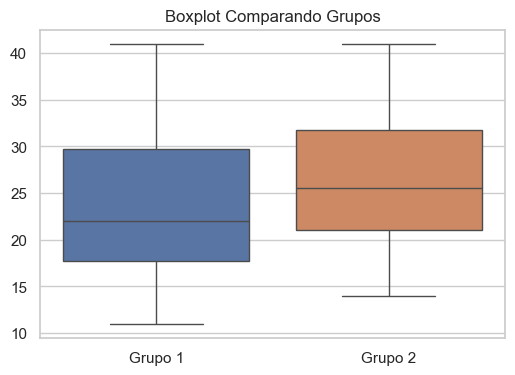

In [3]:

# Escolha do teste
if sw1.pvalue > 0.05 and sw2.pvalue > 0.05:
    print("Distribuição normal - realizando teste t de Student...")
    t_result = stats.ttest_ind(grupo1, grupo2)
    print(f"Teste t: estatística t={t_result.statistic:.4f}, p={t_result.pvalue:.4f}")
else:
    print("Distribuição não-normal - realizando teste de Mann-Whitney...")
    mw_result = stats.mannwhitneyu(grupo1, grupo2, alternative='two-sided')
    print(f"Teste Mann-Whitney: estatística U={mw_result.statistic:.4f}, p={mw_result.pvalue:.4f}")

# Histogramas
plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
sns.histplot(grupo1, bins=5, kde=True, color='blue')
plt.title("Distribuição - Grupo 1")
plt.subplot(1,2,2)
sns.histplot(grupo2, bins=5, kde=True, color='green')
plt.title("Distribuição - Grupo 2")
plt.tight_layout()
plt.show()

# Boxplot comparando
plt.figure(figsize=(6,4))
sns.boxplot(data=[grupo1, grupo2])
plt.xticks([0,1], ["Grupo 1", "Grupo 2"])
plt.title("Boxplot Comparando Grupos")
plt.show()
